X -> (-1,1)
X -> FGM -> Xadv
Xadv -> (0,255)
process -> predict

In [1]:
from module.cleverhans_model import AttackModel, Attacker
from module.utils import * 
from cleverhans.attacks import FastGradientMethod
%matplotlib inline
import logging
logging.getLogger('tensorflow').setLevel(logging.WARNING)

Using TensorFlow backend.


In [2]:
batch_shape = (10, 224, 224, 3)
datag = dev_data_generater(batch_shape=batch_shape)
_,X,Y = next(datag)

resnetv1_50 attack runs: 11.32 s
resnetv1_50 predict runs: 7.49 s
resnetv1_50 predict accuracy : 0.30000001192092896
resnetv1_50 adv accuracy : 0.30000001192092896, L2 12.64566328250103


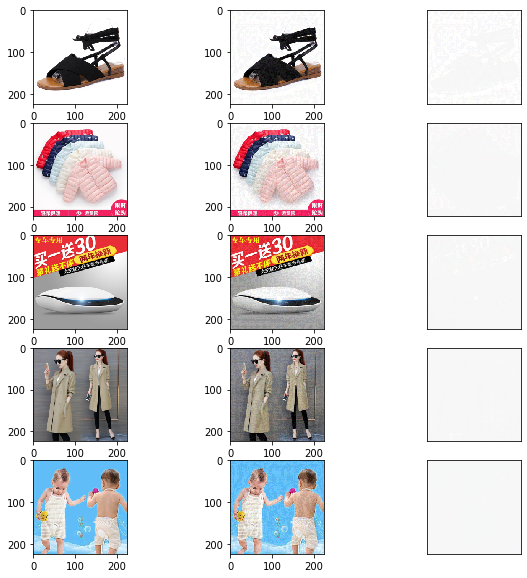

In [7]:
name = 'resnetv1_50'
attack_params = {"eps":16.0 / 255.0, "clip_min": None, "clip_max": None}
A = Attacker(batch_shape, 110)
A.load(name=name)

Xadv = A.attack(X, Y, FastGradientMethod, attack_params, '(-1,1)')

plot_images(X, Xadv)

In [8]:
#Transfer to Inception
name = 'inception_v1'
M=Attacker(batch_shape, 110)
M.load(name=name)

M.predict(Xadv,Y)

inception_v1 predict runs: 5.21 s
inception_v1 predict accuracy : 0.8999999761581421


0.9

In [10]:
name = 'resnetv1_50'
M=Attacker(batch_shape, 110)
M.load(name=name)

M.predict(Xadv,Y)

resnetv1_50 predict runs: 6.10 s
resnetv1_50 predict accuracy : 0.30000001192092896


0.3

In [11]:
#Transfer to vgg
name = 'vgg_16'
M=Attacker(batch_shape, 110)
M.load(name=name)

M.predict(Xadv,Y)

vgg_16 predict runs: 4.40 s
vgg_16 predict accuracy : 0.699999988079071


0.7

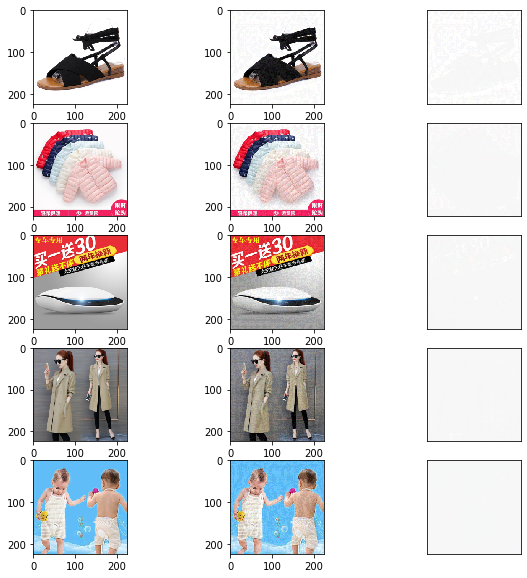

In [12]:
plot_images(X, Xadv)

# Attack Vgg

vgg_16 attack runs: 12.50 s
vgg_16 predict runs: 4.78 s
vgg_16 predict accuracy : 0.5
vgg_16 adv accuracy : 0.5, L2 12.69836599290526


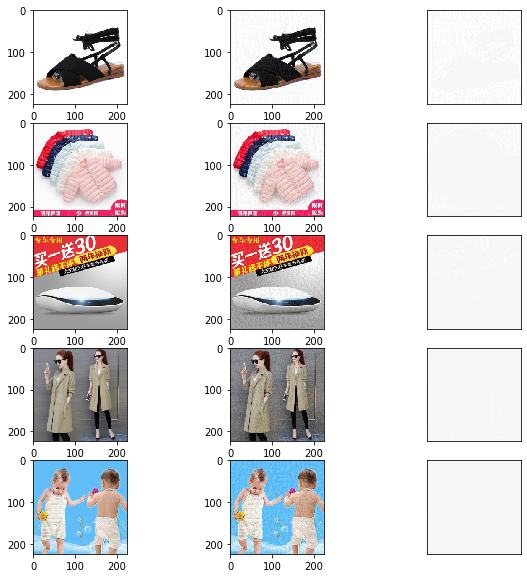

In [13]:
name = 'vgg_16'
attack_params = {"eps":16.0 / 255.0, "clip_min": None, "clip_max": None}
A = Attacker(batch_shape, 110)
A.load(name=name)

Xadv = A.attack(X, Y, FastGradientMethod, attack_params, '(-1,1)')

plot_images(X, Xadv)